In [1]:
import pandas as pd
import numpy as np
import acessos as ac

In [2]:
query = """

select LTV 
from public.rentabilidade_cartoes_diego_camilo 
where mesref = '2023-08'
ORDER BY RAND()
LIMIT 50000


"""

df = ac.df_athena('flavia-costa', query)

In [3]:
len(df)

50000

In [10]:
stats = df.describe()     
p75 = stats.iloc[6]['LTV']
p25 = stats.iloc[4]['LTV']
iqr = p75 - p25
higher_outlier = p75 + (1.5 * iqr)
lower_outlier = p25 - (1.5 * iqr)
sem_outlier = df[df['LTV'] < higher_outlier]
sem_outlier = sem_outlier[sem_outlier['LTV'] > lower_outlier]

In [4]:
df.head()

,LTV
0,5.985536
1,2.000000
2,-6.959775
3,-2.807184
4,-7.231279


In [9]:
stats

,LTV
count,50000.000000
mean,-4.681833
std,284.056822
min,-30211.757159
25%,-3.634596
50%,0.000000
75%,3.056444
max,12569.818814


In [11]:
sem_outlier.describe()

,LTV
count,37598.000000
mean,-0.550621
std,4.452110
min,-13.668494
25%,-2.691632
50%,0.000000
75%,0.533952
max,13.087760


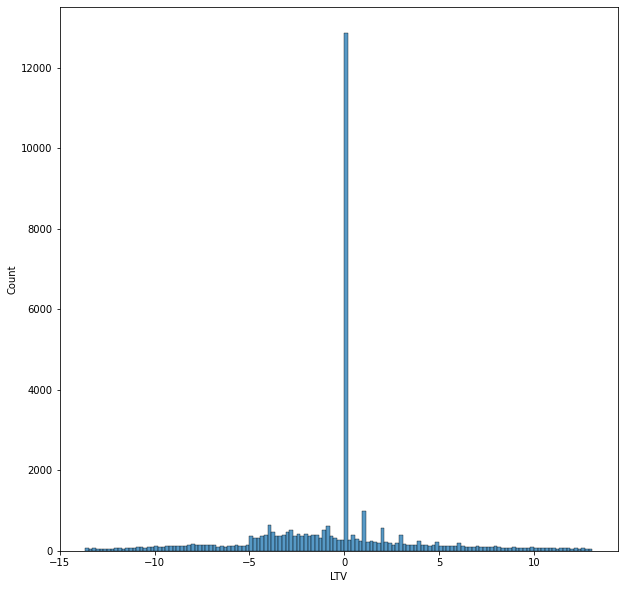

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (10,10))
sns.histplot(sem_outlier.LTV)
plt.show()

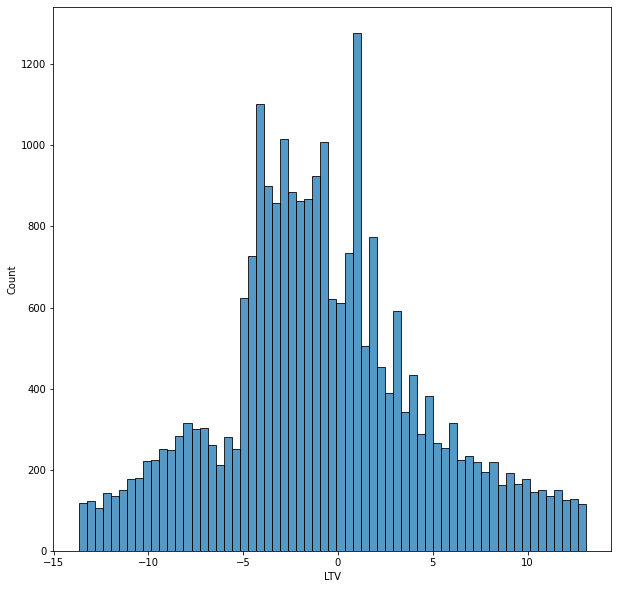

In [13]:
plt.figure(figsize = (10,10))
sns.histplot(sem_outlier.query('LTV != 0').LTV)
plt.show()

In [15]:
df['Classe_LTV'] = np.where(df.LTV > df.LTV.quantile(0.75) + (1.5 * (df.LTV.quantile(0.75) - df.LTV.quantile(0.25))), 'Outlier Superior',
                   np.where(df.LTV < df.LTV.quantile(0.25) - (1.5 * (df.LTV.quantile(0.75) - df.LTV.quantile(0.25))), 'Outlier Inferior',         
                   np.where(df.LTV < 0, 'Rentabilidade Negativa',          
                   np.where(df.LTV == 0, 'Rentabilidade Zero',
                   np.where(df.LTV > df.LTV.quantile(0.75), 'Altamente Rentável',
                   np.where(df.LTV > 0, 'Rentável', 'NI'
                            ))))))

In [17]:
df['Classe_LTV'].value_counts(normalize=True)

Rentabilidade Negativa    0.29584
Rentabilidade Zero        0.25134
Outlier Superior          0.14502
Altamente Rentável        0.10498
Outlier Inferior          0.10302
Rentável                  0.09980
Name: Classe_LTV, dtype: float64

In [18]:
df['Classe_LTV'] = np.where(df.LTV > df.LTV.quantile(0.75) + (3 * (df.LTV.quantile(0.75) - df.LTV.quantile(0.25))), 'Outlier Superior',
                   np.where(df.LTV < df.LTV.quantile(0.25) - (3 * (df.LTV.quantile(0.75) - df.LTV.quantile(0.25))), 'Outlier Inferior',         
                   np.where(df.LTV < 0, 'Rentabilidade Negativa',          
                   np.where(df.LTV == 0, 'Rentabilidade Zero',
                   np.where(df.LTV > df.LTV.quantile(0.75), 'Altamente Rentável',
                   np.where(df.LTV > 0, 'Rentável', 'NI'
                            ))))))

In [19]:
df['Classe_LTV'].value_counts(normalize=True)

Rentabilidade Negativa    0.33138
Rentabilidade Zero        0.25134
Altamente Rentável        0.14540
Outlier Superior          0.10460
Rentável                  0.09980
Outlier Inferior          0.06748
Name: Classe_LTV, dtype: float64

In [20]:
df['Classe_LTV'] = np.where(df.LTV > df.LTV.quantile(0.75) + (5 * (df.LTV.quantile(0.75) - df.LTV.quantile(0.25))), 'Outlier Superior',
                   np.where(df.LTV < df.LTV.quantile(0.25) - (5 * (df.LTV.quantile(0.75) - df.LTV.quantile(0.25))), 'Outlier Inferior',         
                   np.where(df.LTV < 0, 'Rentabilidade Negativa',          
                   np.where(df.LTV == 0, 'Rentabilidade Zero',
                   np.where(df.LTV > df.LTV.quantile(0.75), 'Altamente Rentável',
                   np.where(df.LTV > 0, 'Rentável', 'NI'
                            ))))))

In [21]:
df['Classe_LTV'].value_counts(normalize=True)

Rentabilidade Negativa    0.34868
Rentabilidade Zero        0.25134
Altamente Rentável        0.17192
Rentável                  0.09980
Outlier Superior          0.07808
Outlier Inferior          0.05018
Name: Classe_LTV, dtype: float64

In [24]:
df['Classe_LTV'] = np.where(df.LTV > df.LTV.quantile(0.75) + (10 * (df.LTV.quantile(0.75) - df.LTV.quantile(0.25))), '5. Altamente Rentável',
                   np.where(df.LTV < df.LTV.quantile(0.25) - (10 * (df.LTV.quantile(0.75) - df.LTV.quantile(0.25))), '0. Rentabilidade Muito Negativa',         
                   np.where(df.LTV < 0, '1. Rentabilidade Negativa',          
                   np.where(df.LTV == 0, '2. Rentabilidade Zero',
                   np.where(df.LTV > df.LTV.quantile(0.75), '4. Muito Rentável',
                   np.where(df.LTV > 0, '3. Rentável', 'NI'
                            ))))))

In [25]:
df['Classe_LTV'].value_counts(normalize=True)

1. Rentabilidade Negativa          0.36032
2. Rentabilidade Zero              0.25134
4. Muito Rentável                  0.20220
3. Rentável                        0.09980
5. Altamente Rentável              0.04780
0. Rentabilidade Muito Negativa    0.03854
Name: Classe_LTV, dtype: float64

Se um cliente for das classes 0, 1 e 2 mas tiver até um ano de casa ou 6 meses ele ainda não atingiu o break even